<a href="https://colab.research.google.com/github/vngeno/KNN-AND-NAIVE-BAYES-CLASSIFICATION-MODEL/blob/main/CRUISE_SHIP_ACCIDENT_MODEL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

We will work as data scientists for a cruise ship company to build a model that predicts whether or not a passenger survives an accident in the cruise ship based on the features provided

#Understanding the Concept

The study is based on a true life event of the Royal Mail Ship (RMS) which was a British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 (see Researcher’s Note: Titanic) passengers and ship personnel. One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation.

### b) Defining the Metric for Success


We will create a model that will allow the company to accurately predict wether a person will survive in a cruise ship accident or not.

### d) Recording the Experimental Design


Our analysis will take the below flow:

1.)Defining the question

2.)Data Understanding

3.)Exploratory Data Analysis

4.)Implementing the Solution

6.)Challenging the Solution

## 2. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
data_train = pd.read_csv('/content/train (5).csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_test = pd.read_csv('/content/test (1).csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Checking the columns
print(data_test.columns)
print('***********************************************************************************')
print(data_test.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
***********************************************************************************
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Determining the no. of records in our datasets
#
print(data_train.shape)
print(data_test.shape)

(891, 12)
(418, 11)


In [ ]:
# Checking whether each column has an appropriate datatype
#
print(data_test.info())
print('******************************************************************************************')
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 

## 5. Tidying the Dataset

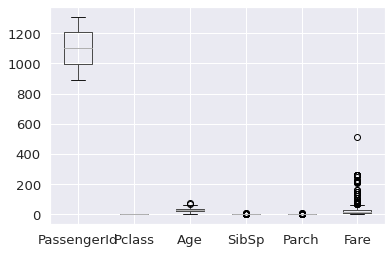

In [ ]:
#Checking for outliers
data_test.boxplot()

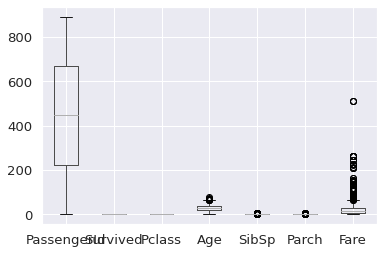

In [ ]:
data_train.boxplot()

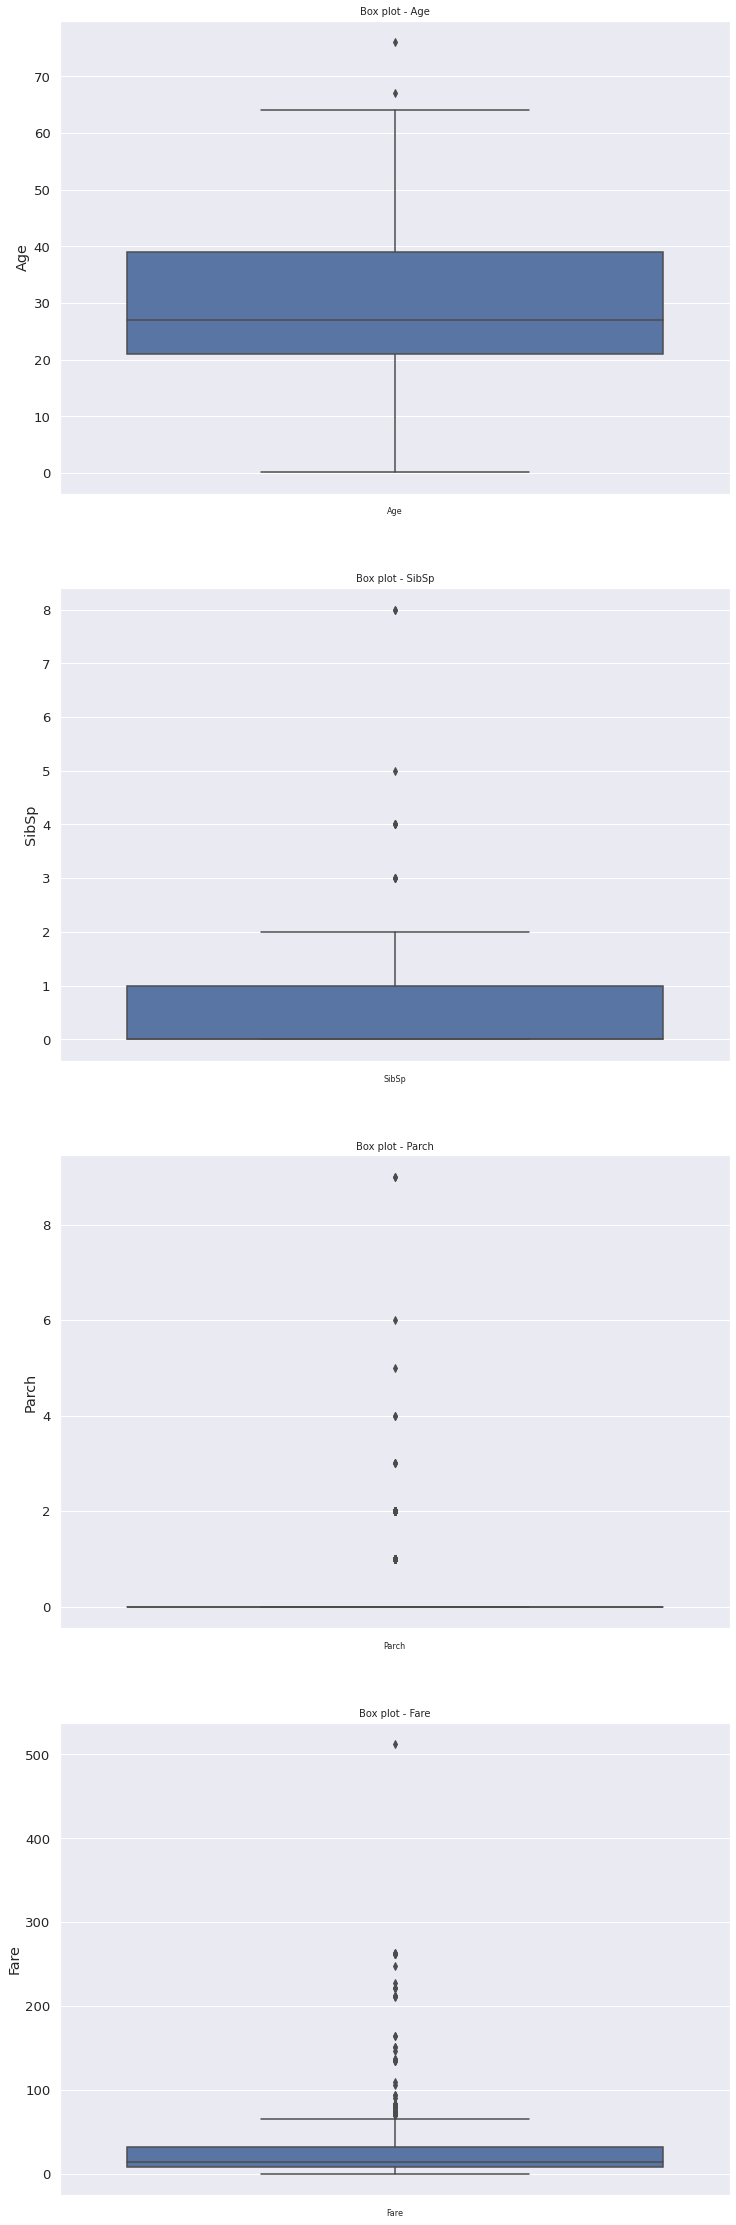

In [ ]:
#Loop method to check for outliers visually using a boxplot
#Test dataset
col_names = ['Age','SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize= (12,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=data_test[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

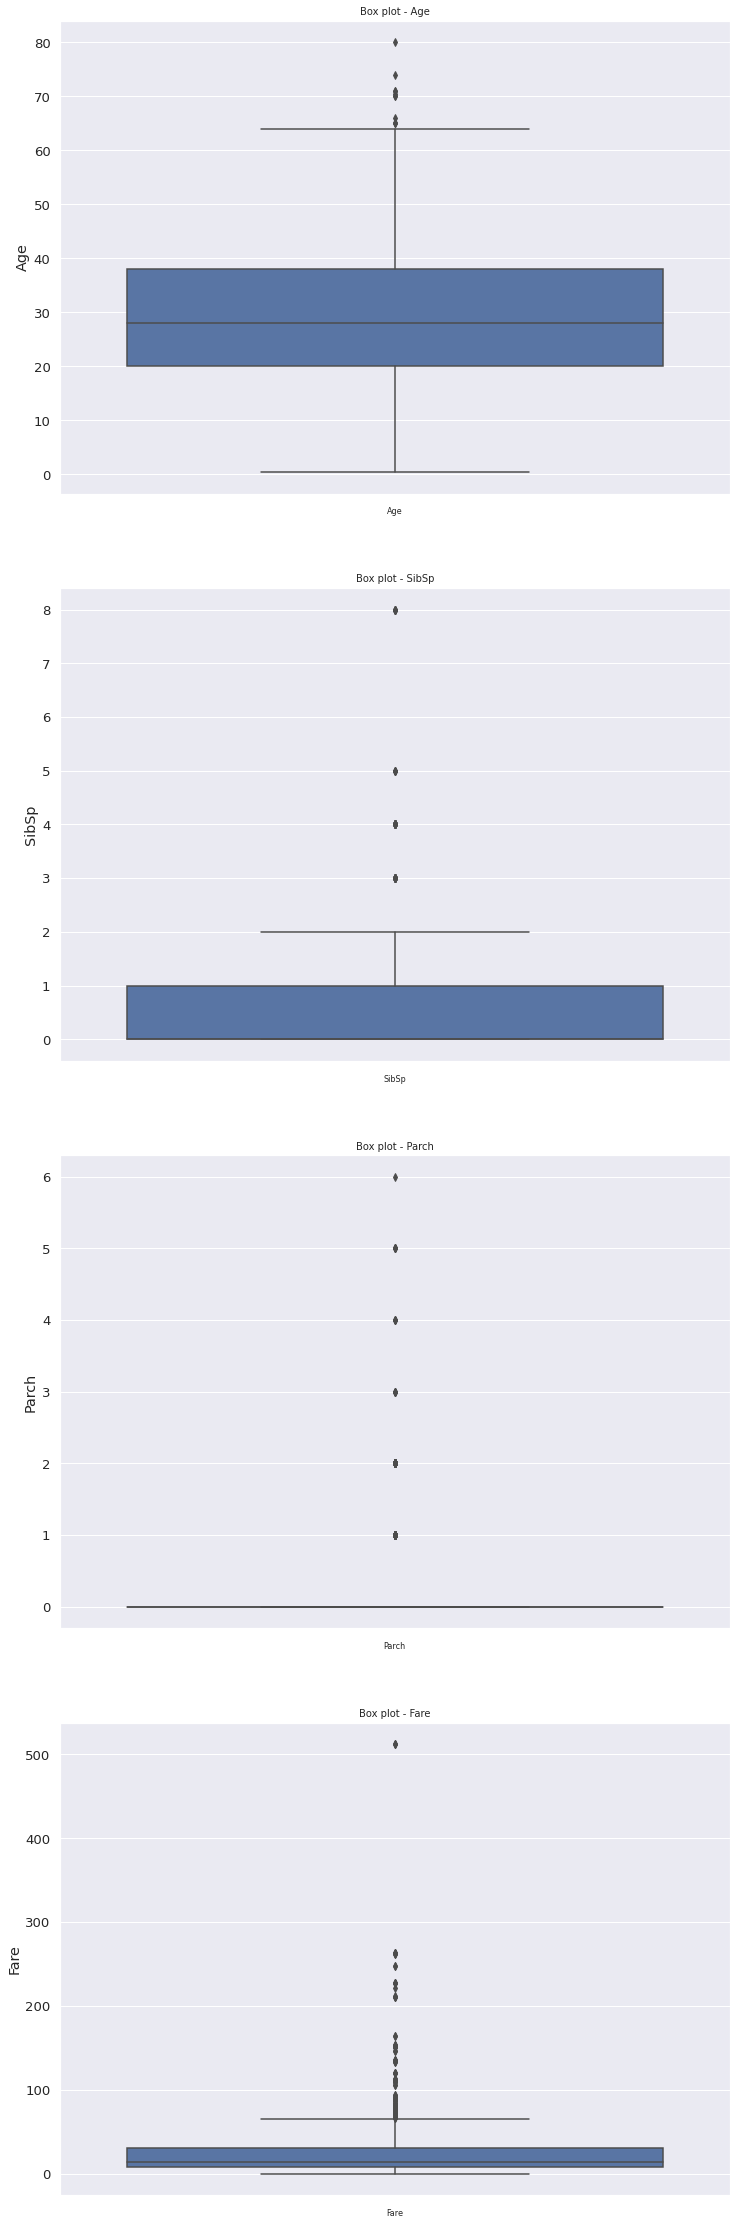

In [ ]:
col_names = ['Age','SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize= (12,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=data_train[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

I decided to keep the outliers as they were in the age, fare, Parch and SibSp columns and removing or changing their values would give false results during modelling

In [ ]:
# Identifying the Missing Data
#
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Dropping the missing values in the datasets
data_test.dropna(inplace=True)
data_train.dropna(inplace=True)

In [ ]:
print(data_test.duplicated().nunique())
print(data_train.duplicated().nunique())

1
1


In [ ]:
#Dropping columns
data_train.drop(['Name','Embarked', 'Fare','Ticket','Cabin'], axis = 1, inplace=True)
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
1,2,1,1,female,38.0,1,0
3,4,1,1,female,35.0,1,0
6,7,0,1,male,54.0,0,0
10,11,1,3,female,4.0,1,1
11,12,1,1,female,58.0,0,0
...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1
872,873,0,1,male,33.0,0,0
879,880,1,1,female,56.0,0,1
887,888,1,1,female,19.0,0,0


# 6. Exploratory Analysis

##Univariate Analysis

In [ ]:
#The summary statistics are as follows
print(data_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch
count   183.000000  183.000000  183.000000  183.000000  183.000000  183.000000
mean    455.366120    0.672131    1.191257   35.674426    0.464481    0.475410
std     247.052476    0.470725    0.515187   15.643866    0.644159    0.754617
min       2.000000    0.000000    1.000000    0.920000    0.000000    0.000000
25%     263.500000    0.000000    1.000000   24.000000    0.000000    0.000000
50%     457.000000    1.000000    1.000000   36.000000    0.000000    0.000000
75%     676.000000    1.000000    1.000000   47.500000    1.000000    1.000000
max     890.000000    1.000000    3.000000   80.000000    3.000000    4.000000


In [ ]:
data_train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
1,2,1,1,female,38.0,1,0
3,4,1,1,female,35.0,1,0


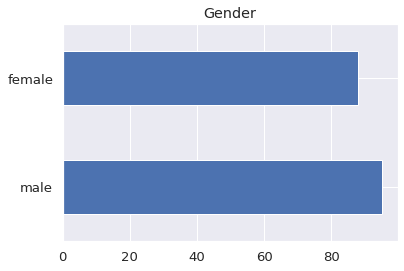

In [ ]:
data_train['Sex'].value_counts().plot(kind='barh')
plt.title('Gender');

In [ ]:
#Skewness
#Positive values indicate that the tail of the data is right-skewed.
print('Skewness of Age: ' +str(data_train['Age'].skew()))

Skewness of Age: 0.00967583943600615


In [ ]:
#Negative values of kurtosis as seen in the Age column indicate that a distribution is flat and has thin tails. Platykurtic distributions have negative kurtosis values.
#A platykurtic distribution is flatter (less peaked) when compared with the normal distribution, with fewer values in its shorter (i.e. lighter and thinner) tails.
print('Kurtosis of Age: ' +str(data_train['Age'].kurt()))

Kurtosis of Age: -0.22618354101694615


**Univariate Interpretation**

There were more males than female passengers hence there could be higher number of males who will not survive or will survive the accident.

##Bivariate Analysis

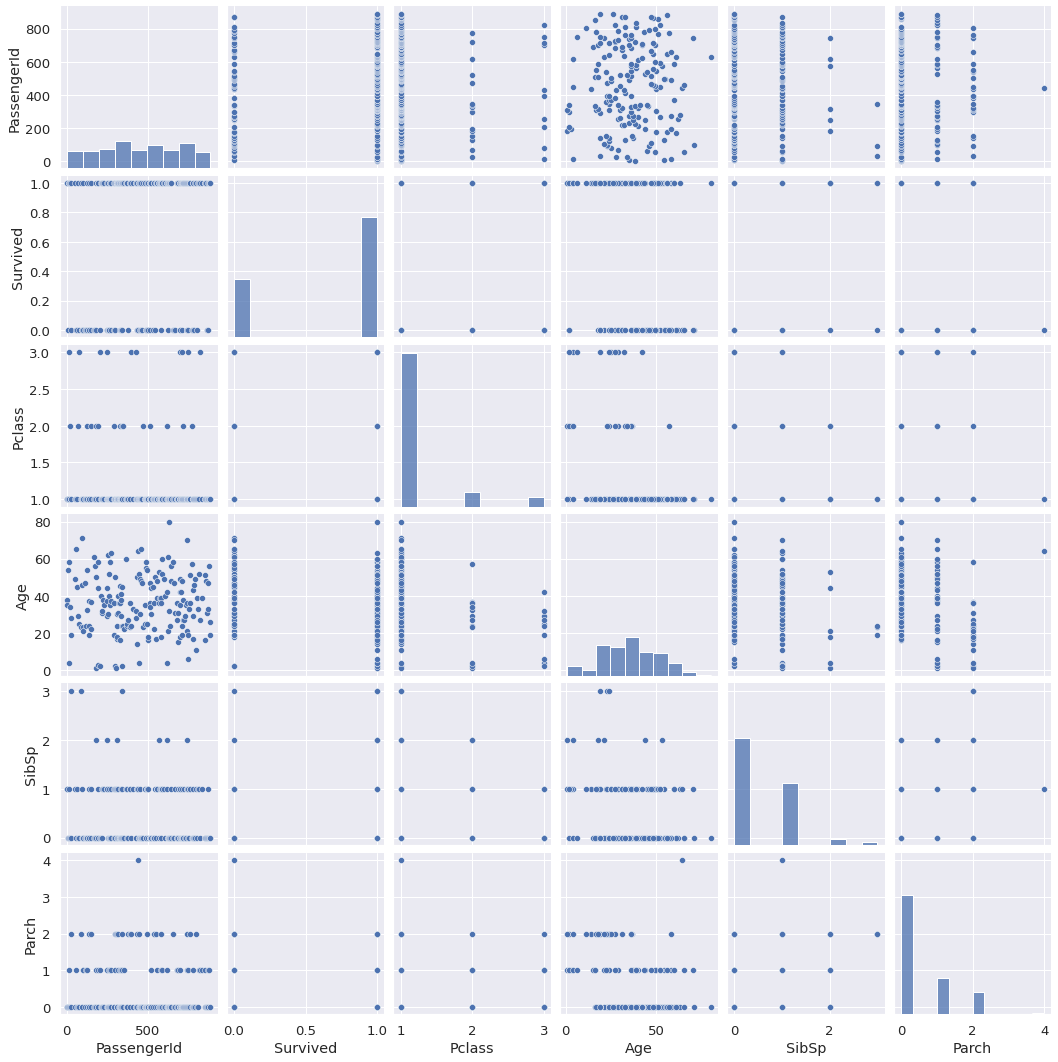

In [ ]:
#The sns pairplot below shows lack of correlation between the features
sns.pairplot(data_train)


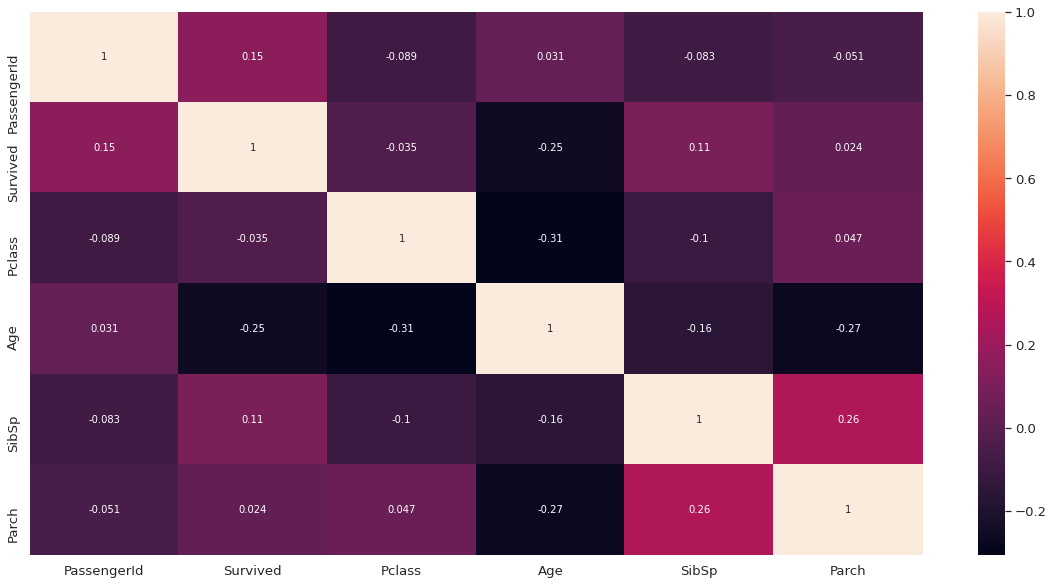

In [ ]:
#Pearson's heatmap to check correlation between the variables
corr = data_train.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

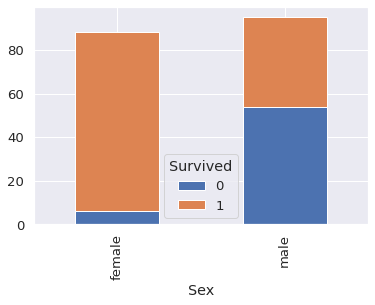

In [ ]:
data_train.groupby('Sex')['Survived'].value_counts().unstack().plot.bar(stacked=True);

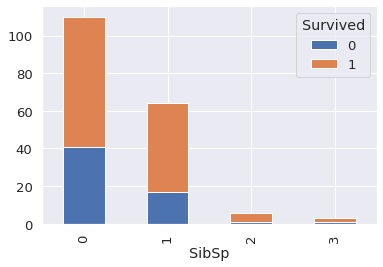

In [ ]:
data_train.groupby('SibSp')['Survived'].value_counts().unstack().plot.bar(stacked=True);

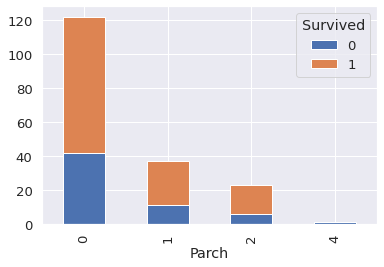

In [ ]:
data_train.groupby('Parch')['Survived'].value_counts().unstack().plot.bar(stacked=True);

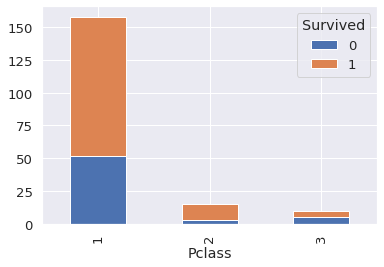

In [ ]:
data_train.groupby('Pclass')['Survived'].value_counts().unstack().plot.bar(stacked=True);

**Bivariate Interpretation**

Here Sibsp means Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children

Pclass - Passenger class.

There's negligible correlation in the variables

There were more females that survived compared to males.

There were more parents/children that survived

Passenger class 1 had most surivors and also had the most deaths.

##Linear Discriminant Analysis

In [ ]:
# Data Reduction
#
#WE'LL APPLY LDA HERE

#Preparing the data for encoding
#We'll drop some columns that are not necessary for the study then convert the remaining columns to numericals
train = data_train.copy(deep=True)
train['Sex'] = data_train['Sex'].astype('category')
train['Age'] = data_train['Age'].astype('category')
train['SibSp'] = data_train['SibSp'].astype('category')
train['PassengerId'] = data_train['PassengerId'].astype('category')
train['Parch'] = data_train['Parch'].astype('category')
train['Pclass'] = data_train['Pclass'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  183 non-null    category
 1   Survived     183 non-null    int64   
 2   Pclass       183 non-null    category
 3   Sex          183 non-null    category
 4   Age          183 non-null    category
 5   SibSp        183 non-null    category
 6   Parch        183 non-null    category
dtypes: category(6), int64(1)
memory usage: 14.1 KB


In [ ]:
#Using label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train = train.copy(deep=True)
train['Sex']=labelencoder.fit_transform(train['Sex'])
train['Sex']

1      0
3      0
6      1
10     0
11     0
      ..
871    0
872    1
879    0
887    0
889    1
Name: Sex, Length: 183, dtype: int64

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [ ]:
# #Rearranging the columns to have Survived as the first column
train = train[['Survived', 'Parch', 'Pclass', 'Sex', 'Age', 'SibSp', 'PassengerId']]
train

,Survived,Parch,Pclass,Sex,Age,SibSp,PassengerId
1,1,0,1,0,38.0,1,2
3,1,0,1,0,35.0,1,4
6,0,0,1,1,54.0,0,7
10,1,1,3,0,4.0,1,11
11,1,0,1,0,58.0,0,12
...,...,...,...,...,...,...,...
871,1,1,1,0,47.0,1,872
872,0,0,1,1,33.0,0,873
879,1,1,1,0,56.0,0,880
887,1,0,1,0,19.0,0,888


In [ ]:
#Separating the target label (price) from the other features

feat = train.iloc[:,1:6]
label = train['Survived']

In [ ]:

#Subject our frame to LDA model

#import LDA method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating an instance of LDA

lda = LDA()

lda_ = lda.fit(feat, label)
lda_feat = lda_.transform(feat)

#Displaying coefficients of the reducted columns
lda_.coef_

array([[-0.33919336, -0.71053487, -3.14878372, -0.04304345,  0.14234767]])

In [ ]:

new_df = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
new_df.sort_values(0, ascending=False)


,0
SibSp,0.142348
Age,-0.043043
Parch,-0.339193
Pclass,-0.710535
Sex,-3.148784


**LDA INTERPRETATION**

The major features that determine survival of a passenger is Number of siblings or spouses on board, followed by age then number of Parents/Children.

Sex and Passenger class have minimal determination of passenger survival

#Implementing the Solution

##Modelling

###KNN Classifier Model

In [ ]:
# Splitting our dataset into its attributes and labels
X = train.iloc[:,1:6].values
y = train['Survived'].values

In [ ]:
# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
# In the second line, this class is initialized with one parameter, i.e. n_neigbours.
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#We'll now make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluating the Algorithm
# In evaluating an algorithm, confusion matrix, precision, F1 score are the commonly used metrics
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
precision, recall = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
print(precision, recall)


[[ 6  2]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.92      0.79      0.85        29

    accuracy                           0.78        37
   macro avg       0.71      0.77      0.73        37
weighted avg       0.83      0.78      0.80        37

0.7837837837837838
0.92 0.7931034482758621


In [ ]:
# Train Test Split with 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
#Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Fitting the KNN model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#We'll now make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluating the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
precision, recall = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
print(precision, recall)

[[ 9  4]
 [ 9 33]]
              precision    recall  f1-score   support

           0       0.50      0.69      0.58        13
           1       0.89      0.79      0.84        42

    accuracy                           0.76        55
   macro avg       0.70      0.74      0.71        55
weighted avg       0.80      0.76      0.78        55

0.7636363636363637
0.8918918918918919 0.7857142857142857


In [ ]:
# Train Test Split with 60/40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
#Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Fitting the KNN model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#We'll now make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluating the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
precision, recall = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
print(precision, recall)

[[10 17]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.71      0.37      0.49        27
           1       0.72      0.91      0.80        47

    accuracy                           0.72        74
   macro avg       0.72      0.64      0.65        74
weighted avg       0.72      0.72      0.69        74

0.7162162162162162
0.7166666666666667 0.9148936170212766


**KNN CLASSIFIER MODEL INTERPRETATION**

From the above, we notice that our model gets better having increased the test size. 
Generally the model is a good fit with a F1 score of 0.49 and precision of 71%, accuracy of 71% using the largest test size of 40.

The confusion matrix also keeps getting better with 10 & 43 accurate values on the 3rd model

Regression


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [ ]:
#Making our prediction
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.18707738542449287
0.3785123966942147


**KNN REGRESSOR MODEL INTERPRETATION**


The RMSE score is quite low hence the regressor model is also a good fit

###NAIVE BAYES CLASSIFIER 

####Gaussian Naive Bayes Classifier

In [ ]:
#Splitting the data to train size of 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [ ]:
# Training our model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [ ]:
#Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7454545454545455


**GAUSSIAN NAIVE BAYES CLASSIFIER INTERPRETATION**

The above result shows that, there's a 75% chance of passenger survival during the accident. 

#Challenging the solution

Generally the data we worked with was accurate, however we had to drop a number of missing values hence that should be investigated further. 



#Follow up questions

### a). Did we have the right data?

The data we had is right and has produced quite accurate results even without getting rid of outliers

### b). Do we need other data to answer our question?

Our question is well answered

### c). Did we have the right question?

Yes we did have the correct question